In [18]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 8. Mean

In [19]:
# Create an array of numbers

arr = np.array([1,2,3.33,4.23,5.75])

n = len(arr)

mean1 = np.mean(arr )
mean2 = np.sum(arr)/n

print("Direct from function : ",round(mean1 , 3 ))
print("Using formula : ",round(mean2,3 ))

Direct from function :  3.262
Using formula :  3.262


## 9. Variance 

In [20]:
# ddof : int, optional

# ddof : "Delta Degrees of Freedom": the divisor used in the calculation is 'N - ddof', 
#                                    where 'N' represents the number of elements. 

# Bydefault ddof` is zero.
# ddof = 0 : results in biased variance     

arr = [1,2,2,3,5,10,20]
n = len(arr)

# Biased variance
var1 = np.var(arr)

# Un-biased variance
var2 = np.sum((arr - np.mean(arr))**2 )/ (n-1) 

print("biased variance : ", round(var1,3))
print("unbiased variance : ", round(var2,3))

biased variance :  39.837
unbiased variance :  46.476


In [21]:
# calculating unbiased variance directly

var3 = np.var(arr , ddof = 1)

print(round(var3,3))

46.476


## 10. Random sampling and sampling variabilty

In [22]:
# Create a list of numbers

x = [1,2,4,6,5,4,0,-4,5,-2,6,10,-9,1,3,-6]
n = len(x)

popmean = np.mean(x)

In [23]:
# Taking a sample from 'x' with replacement

sample = np.random.choice(a = x, size=5)
sampmean = np.mean(sample)

print(f"Population mean : {popmean}")
print(f"sample mean : {sampmean}")

Population mean : 1.625
sample mean : 2.6


In [24]:
# To reduce the sample variabilty taking many samples
nexp = 500

samplemean = np.zeros(nexp)

for i in range(nexp):
    
    sample = np.random.choice(x , size = 5)
    sampmean = np.mean(sample)
    samplemean[i] = sampmean

print(np.round(sum(samplemean)/len(samplemean),3))

1.558


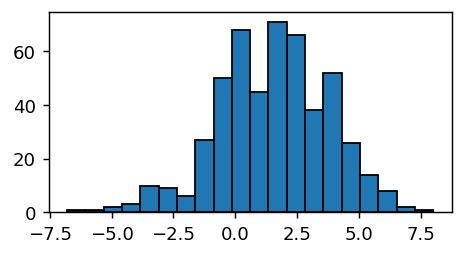

In [26]:
plt.figure(figsize = (4,2) , dpi = 130)
plt.hist(x = samplemean , bins = 20 , ec = 'black' )

plt.show()

## 11. Reproducible randomness via seeding

### Using numpy

In [29]:
# old but still widely used

np.random.seed(123)

print(np.random.rand(5))
print(np.random.randn(4))

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
[ 0.32210607 -0.05151772 -0.20420096  1.97934843]


#### new seed mechanism

In [15]:
# randseed1 and randseed2 should be present in the same block of code as below
randseed1 = np.random.RandomState(111)  
randseed2 = np.random.RandomState(222)

print(randseed1.randn(5))
print(randseed1.randn(5))
print()
print(randseed2.randn(5))
print(randseed2.randn(5))
print()
print(np.random.randn(5))

[-1.13383833  0.38431919  1.49655378 -0.3553823  -0.78753354]
[-0.45943891 -0.05916877 -0.3541735  -0.73552305 -1.18393989]

[ 1.96342502  0.27576969  0.4586582   1.00126466 -0.76383531]
[ 0.72192766 -0.90546956  1.00187339 -0.52074247  0.30895287]

[ 0.07964464  1.07490094 -0.47143752 -0.16617609 -0.41509357]


### Using pytorch

In [53]:
torch.randn(5)

tensor([-0.3561, -1.4036,  1.2475,  1.1617,  1.7563])

In [17]:
torch.manual_seed(14)
print(torch.randn(5))

# It doesnot affect the numpy random number generator
print(np.random.randn(5))

tensor([-1.0141, -0.3720, -0.7516, -0.8623, -0.3270])
[ 0.72139589 -0.09070902 -1.5550278   1.66761601 -0.43024859]


## 12. t-test

In [28]:
import scipy.stats as stats

In [29]:
# Parameters 
n1 = 30   # number of datapoints in sample 1 (from dataset -1)
n2 = 40   # number of datapoints in sample 2 (from dataset -2)

mu1 = 1    # population mean of dataset 1
mu2 = 2    # population mean of dataset 2

In [30]:
# Gernerate the data
data1 = mu1 + np.random.randn(n1)

data2 = mu2 + np.random.randn(n2)

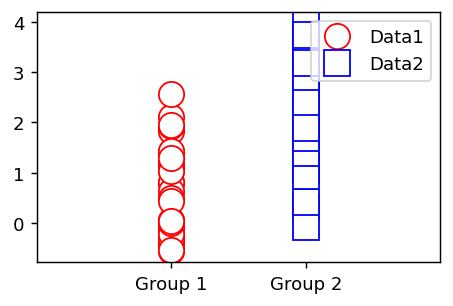

In [31]:
# Plotting

plt.figure(figsize = (4,2.5) ,dpi = 130)

plt.plot(np.zeros(n1) , data1 , 'ro' , markerfacecolor = 'w' , 
        markersize = 14 ,label = "Data1")

plt.plot(np.ones(n2) , data2 , 'bs' ,markerfacecolor = 'w' ,
         markersize = 14 , label = 'Data2')

plt.xlim([-1,2])

plt.xticks(ticks=[0,1], labels=['Group 1' , 'Group 2'])
plt.legend()
plt.show()

# there is overlapping of datapoints

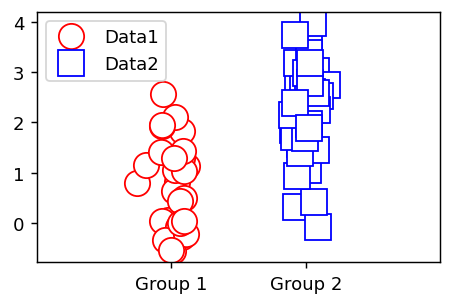

In [32]:
# Correcting above problem

plt.figure(figsize = (4,2.5) ,dpi = 130)

plt.plot(0+np.random.randn(n1)/15 , data1 , 'ro' , 
         markerfacecolor = 'w' , markersize = 14 ,label = "Data1")

plt.plot(1+np.random.randn(n2)/15 , data2 , 'bs' ,
         markerfacecolor = 'w' , markersize = 14 , label = 'Data2')

plt.xlim([-1,2])

plt.xticks(ticks=[0,1], labels=['Group 1' , 'Group 2'])
plt.legend()
plt.show()

### t-test via stats module of scipy

In [70]:
t ,p = stats.ttest_ind(data2,data1)

print("t-value",t)
print("p-value" , p)  # critical p-value is 0.05  (5% significance level)

# we have to reject the null hypothesis that two sample means are equal

t-value 3.6999651472661435
p-value 0.00043334397290418044
